<a href="https://colab.research.google.com/github/acts701/Audio/blob/main/241028_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# 변수의 shape, type, value 확인
def p(var,_name="") :
    if _name != "" : print(f'<<{_name}>>')
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}')

In [26]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,3]
plt.rcParams['font.size'] = '8'

keras.__version__

'3.4.1'

In [27]:
level_of_noise = 0.7

In [35]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train/255, x_test/255
x_train_f = x_train.reshape(-1, 28*28)
x_test_f = x_test.reshape(-1, 28*28)

noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_train_f.shape))
x_train_f_n = x_train_f + noise
x_train_f_n = np.clip(x_train_f_n, 0, 1)

noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_test_f.shape))
x_test_f_n = x_test_f + noise
x_test_f_n = np.clip(x_test_f_n, 0, 1)

# plt.imshow(x_trainNoise[0].reshape(28,28))
# pst(x_train) Shape(60000, 28, 28)
# pst(y_train) Shape(60000,)
# pst(x_test) Shape(10000, 28, 28),
# pst(y_test) Shape(10000,)
# pst(noise) Shape(10000, 784)
# pst(x_trainNoise) Shape(60000, 784)
# print(y_train[0])
# plt.imshow(x_train[0].reshape(28,28))
# pst(x_train2D) ape(60000, 784)

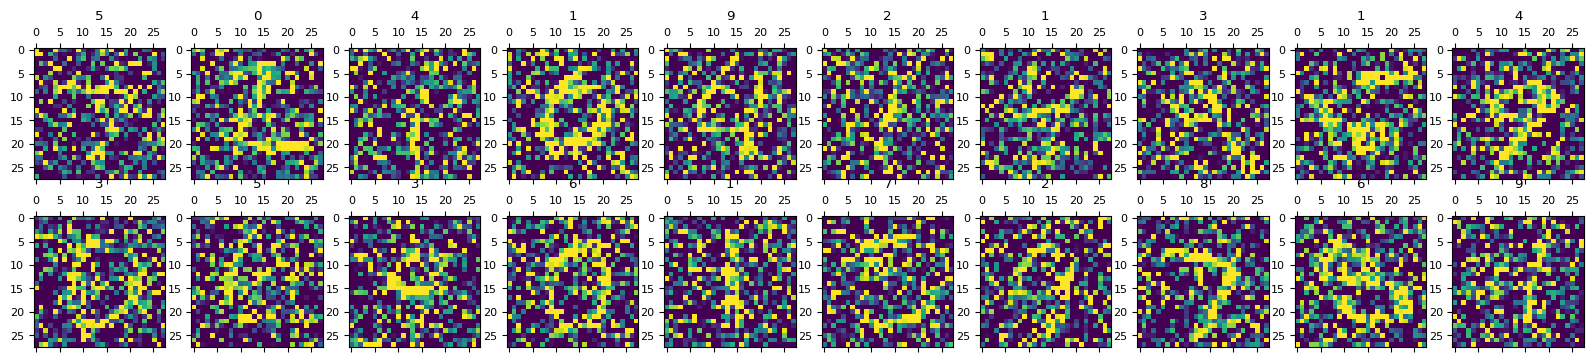

In [30]:
# fig, axs = plt.subplots(2, 10, sharey=False, tight_layout=True, figsize=(20,4), facecolor='white')
fig, axs = plt.subplots(2, 10, figsize=(20,4))

n = 0
for i in range(0,2):
    for j in range(0,10):
        axs[i,j].matshow(x_test_f_n[n].reshape(28,28))
        axs[i,j].set(title = y_train[n])
        n=n+1
plt.show()

In [31]:
def f_ModelAcc():
    modelAcc = keras.models.Sequential([
        keras.Input(shape=[28,28,1]),
        layers.Conv2D(128, 3, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(2,2),
        layers.Conv2D(256,3,padding='same'),
        layers.Activation('relu'),
        layers.MaxPool2D(2,2),
        layers.Conv2D(128,3,padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Flatten(name='flatten'),
        layers.Dense(10, activation='softmax')
    ])
    modelAcc.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy', metrics=['acc'])
    return modelAcc

In [32]:
modelAcc = f_ModelAcc()
history = modelAcc.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - acc: 0.9243 - loss: 0.2549 - val_acc: 0.9341 - val_loss: 0.2845
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - acc: 0.9886 - loss: 0.0365 - val_acc: 0.9887 - val_loss: 0.0341
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9928 - loss: 0.0239 - val_acc: 0.9901 - val_loss: 0.0320
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - acc: 0.9956 - loss: 0.0148 - val_acc: 0.9912 - val_loss: 0.0268
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - acc: 0.9960 - loss: 0.0129 - val_acc: 0.9894 - val_loss: 0.0363


In [36]:
x_train_n_2D = x_train_f_n.reshape(-1,28,28)
x_test_n_2D = x_test_f_n.reshape(-1,28,28)

modelNoise = f_ModelAcc()
historyNoise = modelNoise.fit(x_train_n_2D, y_train, batch_size=128, epochs=5, validation_data=(x_test_n_2D, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - acc: 0.7674 - loss: 0.7359 - val_acc: 0.9066 - val_loss: 0.3696
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9255 - loss: 0.2275 - val_acc: 0.9217 - val_loss: 0.2362
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9395 - loss: 0.1823 - val_acc: 0.9172 - val_loss: 0.2478
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9507 - loss: 0.1489 - val_acc: 0.9259 - val_loss: 0.2262
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9652 - loss: 0.1077 - val_acc: 0.9178 - val_loss: 0.2677


In [38]:
_, acc = modelAcc.evaluate(x_test, y_test)
print(f'normal train, normal test = {acc*100:.3f}%')
_, acc = modelAcc.evaluate(x_test_n_2D, y_test)
print(f'normal train, noisy test = {acc*100:.3f}%')
_, acc = modelNoise.evaluate(x_test, y_test)
print(f'noisy train, normal input = {acc*100:.3f}%')
_, acc = modelNoise.evaluate(x_test_n_2D, y_test)
print(f'noisy train, noisy test = {acc*100:.3f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9863 - loss: 0.0475
normal train, normal test = 98.940%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.0941 - loss: 23.5847
normal train, noisy test = 9.740%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9814 - loss: 0.0644
noisy train, normal input = 98.470%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9018 - loss: 0.3177
noisy train, noisy test = 91.780%


In [42]:
latentDim = 10

In [67]:

from keras.constraints import max_norm

def AE():
    input = layers.Input(shape=(784,))
    x = layers.Dense(128, activation='relu', kernel_constraint=max_norm(2.))(input)
    x = layers.Dense(64, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(latentDim, activation='linear', kernel_constraint=max_norm(2.),name='enc')(x)

    x = layers.Dense(32, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(128, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(784, activation='sigmoid', kernel_constraint=max_norm(2.),name='dec')(x)
    return keras.Model(input, x)

model = AE()
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ enc (Dense)                          │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dec (Dense)                          │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,098 (840.23 KB)

 Trainable params: 215,098 (840.23 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
epochs=50
batchsize=512
model = AE()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [73]:
result1 = model.fit(x_train_f_n, x_train_f_n, epochs=epochs, batch_size=batchsize, validation_data=(x_test_f_n, x_test_f_n))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1488 - val_loss: 0.1358
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1346 - val_loss: 0.1315
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1309 - val_loss: 0.1295
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1293 - val_loss: 0.1288
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1288 - val_loss: 0.1285
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1285 - val_loss: 0.1285
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1283 - val_loss: 0.1283
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1281 - val_loss: 0.1280
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1279 - val_loss: 0.1279
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1278 - val_loss: 0.1278
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1277 - val_loss: 0.1276
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

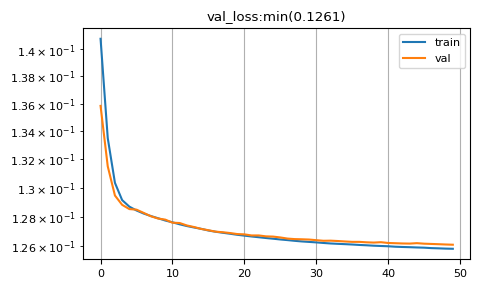

In [82]:
hist = result1.history
plt.title(f"val_loss:min({min(hist['val_loss']):0.4f})")
plt.plot(hist['loss'], label='train')
plt.plot(hist['val_loss'], label='val')
plt.semilogy()
plt.grid()
plt.legend()
plt.show()

In [83]:
decoded_img = []
decoded_img.append(model.predict(x_test_f_n[0:20]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


In [ ]:
num_imgs=9
n_row=3

plt.figure(figsize=(30,9))
#for i in range(